In [1]:
!pip install datasets
import datasets
import torch
from torch.utils.data import Dataset, DataLoader

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 13.7 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
from datasets import load_dataset

# Load the IMDB dataset
imdb_dataset = load_dataset("imdb")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/7.81k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/21.0M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/20.5M [00:00<?, ?B/s]

unsupervised-00000-of-00001.parquet:   0%|          | 0.00/42.0M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating unsupervised split:   0%|          | 0/50000 [00:00<?, ? examples/s]

In [3]:
# prompt: from datasets import load_dataset
# # Load the IMDB dataset
# imdb_dataset = load_dataset("imdb") from thsi to pandas dataframe

import pandas as pd

# Assuming 'imdb_dataset' is already loaded as in the previous code

def dataset_to_pandas(dataset):
  """Converts a Hugging Face dataset to a pandas DataFrame."""

  # Handle potential errors if the dataset doesn't have a 'train' split
  try:
      train_df = pd.DataFrame(dataset['train'])
      test_df = pd.DataFrame(dataset['test'])
  except KeyError:
      if 'train' not in dataset:
        print("Error: 'train' split not found in the dataset.")
        return None  # or handle the error as needed
      elif 'test' not in dataset:
          print("Error: 'test' split not found in the dataset.")
          return None # or handle the error as needed
      else:
          print("Unexpected KeyError")
          return None

  # Concatenate train and test DataFrames if both are available
  if 'test' in dataset:
      return pd.concat([train_df, test_df], ignore_index=True)
  else:
      return train_df


# Convert the dataset to a pandas DataFrame
imdb_df = dataset_to_pandas(imdb_dataset)

# Now you can work with imdb_df
if imdb_df is not None:
  print(imdb_df.head())
  print(imdb_df.info())
else:
    print("Failed to convert dataset to DataFrame.")


                                                text  label
0  I rented I AM CURIOUS-YELLOW from my video sto...      0
1  "I Am Curious: Yellow" is a risible and preten...      0
2  If only to avoid making this type of film in t...      0
3  This film was probably inspired by Godard's Ma...      0
4  Oh, brother...after hearing about this ridicul...      0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    50000 non-null  object
 1   label   50000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 781.4+ KB
None


In [4]:
imdb_df

,text,label
0,I rented I AM CURIOUS-YELLOW from my video sto...,0
1,"""I Am Curious: Yellow"" is a risible and preten...",0
2,If only to avoid making this type of film in t...,0
3,This film was probably inspired by Godard's Ma...,0
4,"Oh, brother...after hearing about this ridicul...",0
...,...,...
49995,Just got around to seeing Monster Man yesterda...,1
49996,I got this as part of a competition prize. I w...,1
49997,I got Monster Man in a box set of three films ...,1
49998,"Five minutes in, i started to feel how naff th...",1


In [5]:
imdb_df.label.value_counts()

,count
label,
0,25000
1,25000


<ipython-input-8-73e0cf7f5f87>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=imdb_df,palette='coolwarm')


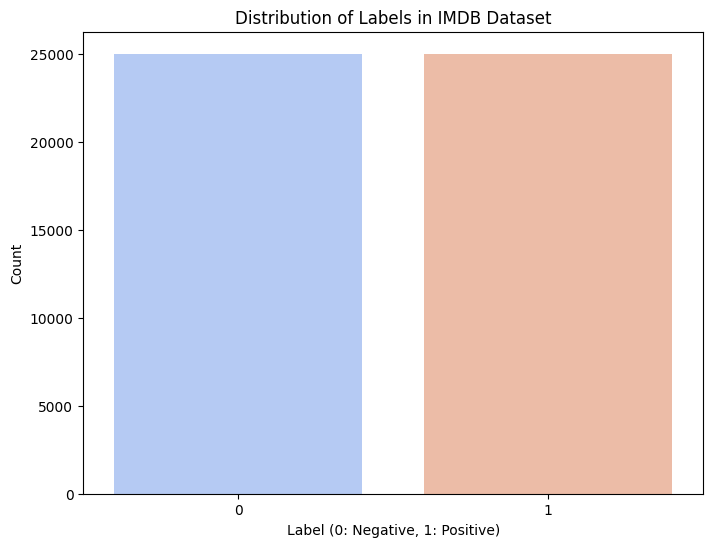

In [8]:

plt.figure(figsize=(8, 6))
sns.countplot(x='label', data=imdb_df,palette='coolwarm')
plt.title('Distribution of Labels in IMDB Dataset')
plt.xlabel('Label (0: Negative, 1: Positive)')
plt.ylabel('Count')
plt.show()

In [10]:
X,y=imdb_df['text'],imdb_df['label']
(x_train,x_test,y_train,y_test)=train_test_split(X,y,test_size=0.2,random_state=42)



In [13]:
def train_test(x,y):
  df1=pd.DataFrame(x)
  df1.rename(columns={0:"reviews"})
  df2=pd.DataFrame(y)
  df2.rename(columns={0:"sentiment"})

  df=pd.concat([df1,df2],axis=1)
  return df
df_train=train_test(x_train,y_train)
df_test=train_test(x_test,y_test)

In [24]:
text=df_train["text"][1]
text

'"I Am Curious: Yellow" is a risible and pretentious steaming pile. It doesn\'t matter what one\'s political views are because this film can hardly be taken seriously on any level. As for the claim that frontal male nudity is an automatic NC-17, that isn\'t true. I\'ve seen R-rated films with male nudity. Granted, they only offer some fleeting views, but where are the R-rated films with gaping vulvas and flapping labia? Nowhere, because they don\'t exist. The same goes for those crappy cable shows: schlongs swinging in the breeze but not a clitoris in sight. And those pretentious indie movies like The Brown Bunny, in which we\'re treated to the site of Vincent Gallo\'s throbbing johnson, but not a trace of pink visible on Chloe Sevigny. Before crying (or implying) "double-standard" in matters of nudity, the mentally obtuse should take into account one unavoidably obvious anatomical difference between men and women: there are no genitals on display when actresses appears nude, and the s

In [17]:
#removing punctuations
#library that contains punctuation
import string
string.punctuation


'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [26]:
def remove_punctuation(text):
  if type(text)==float:
    return text
  ans=""
  for i in text:
    if i not in string.punctuation:
      ans+=i
  return ans

In [27]:
remove_punctuation(text)

'I Am Curious Yellow is a risible and pretentious steaming pile It doesnt matter what ones political views are because this film can hardly be taken seriously on any level As for the claim that frontal male nudity is an automatic NC17 that isnt true Ive seen Rrated films with male nudity Granted they only offer some fleeting views but where are the Rrated films with gaping vulvas and flapping labia Nowhere because they dont exist The same goes for those crappy cable shows schlongs swinging in the breeze but not a clitoris in sight And those pretentious indie movies like The Brown Bunny in which were treated to the site of Vincent Gallos throbbing johnson but not a trace of pink visible on Chloe Sevigny Before crying or implying doublestandard in matters of nudity the mentally obtuse should take into account one unavoidably obvious anatomical difference between men and women there are no genitals on display when actresses appears nude and the same cannot be said for a man In fact you ge

In [31]:
# prompt: [x for x in text if x not in string.punctuation] this pattern write remove punctuation function

def remove_punctuation(text):
  text=text.lower()
  if isinstance(text, float):
    return text
  return "".join([x for x in text if x not in string.punctuation])

In [92]:
import string

def remove_punctuation(text):
    if isinstance(text, float):  # Handle cases where text is a float
        return text

    text = text.lower()  # Convert text to lowercase
    return "".join([x for x in text if x not in string.punctuation and x not in string.digits])


In [99]:
df1=df_train.copy()
df1["process_text"]=df1["text"].map(remove_punctuation)

'this is '

In [37]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [38]:
text1=remove_punctuation(text)
text1

'i am curious yellow is a risible and pretentious steaming pile it doesnt matter what ones political views are because this film can hardly be taken seriously on any level as for the claim that frontal male nudity is an automatic nc17 that isnt true ive seen rrated films with male nudity granted they only offer some fleeting views but where are the rrated films with gaping vulvas and flapping labia nowhere because they dont exist the same goes for those crappy cable shows schlongs swinging in the breeze but not a clitoris in sight and those pretentious indie movies like the brown bunny in which were treated to the site of vincent gallos throbbing johnson but not a trace of pink visible on chloe sevigny before crying or implying doublestandard in matters of nudity the mentally obtuse should take into account one unavoidably obvious anatomical difference between men and women there are no genitals on display when actresses appears nude and the same cannot be said for a man in fact you ge

In [47]:
n_gram=int(input("enter the n_gram value"))


word=[word for word in text1.split() if word not in set(stopwords.words('english'))]
temp=zip(*[word[i:] for i in range(n_gram)])
ans=[' '.join(ngram) for ngram in temp]
ans
temp


enter the n_gram value2


In [57]:
def generate_n_gram(text,n_gram):
  word=[word for word in text.split() if word not in set(stopwords.words('english'))]
  temp=zip(*[word[i:] for i in range(n_gram)])
  ans=[' '.join(ngram) for ngram in temp]
  return ans


In [59]:
generate_n_gram("The sun rises in the east ",2)

['The sun', 'sun rises', 'rises east']

In [62]:
from collections import defaultdict

In [63]:
positiveValues=defaultdict(int)
negativeValues=defaultdict(int)

#get the count of every word in both the columns of df_train and df_test dataframes
positiveValues

defaultdict(int, {})

In [68]:
df1

,text,label,process_text
39087,Thomas Mann's controversial novel is the basis...,1,thomas manns controversial novel is the basis ...
30893,"For producer David O. Selznick, no one directo...",0,for producer david o selznick no one director ...
45278,Film noir meets anime... brilliant! This was o...,1,film noir meets anime brilliant this was one o...
16398,"I love Eddie Izzard. I think this is awesome, ...",1,i love eddie izzard i think this is awesome an...
13653,"""The Last Big Thing"" is a wonderful satirical ...",1,the last big thing is a wonderful satirical fi...
...,...,...,...
11284,"The ""documentary"", and we use that term loosel...",0,the documentary and we use that term loosely a...
44732,This outlandish Troma movie is actually a very...,1,this outlandish troma movie is actually a very...
38158,I found the film Don't Look In The Basement to...,1,i found the film dont look in the basement to ...
860,I have read the novel Reaper of Ben Mezrich a ...,0,i have read the novel reaper of ben mezrich a ...


In [73]:
for text in df1[df1['label'] == 1]['process_text']:
  for word in generate_n_gram(text,2):
    positiveValues[word]+=1

In [74]:
for text in df1[df1['label'] == 0]['process_text']:
  for word in generate_n_gram(text,2):
    negativeValues[word]+=1

In [65]:
positiveValues

defaultdict(int, {})

In [75]:
df_positive=pd.DataFrame(sorted(positiveValues.items(),key=lambda x:x[1],reverse=True))
df_negative=pd.DataFrame(sorted(negativeValues.items(),key=lambda x:x[1],reverse=True))

In [76]:
pd1=df_positive[0][:10]
pd2=df_positive[1][:10]

In [77]:
pd1

,0
0,br br
1,one best
2,br film
3,even though
4,ive seen
5,br movie
6,ever seen
7,first time
8,itbr br
9,dont know


In [78]:
ned1=df_negative[0][:10]
ned2=df_negative[1][:10]

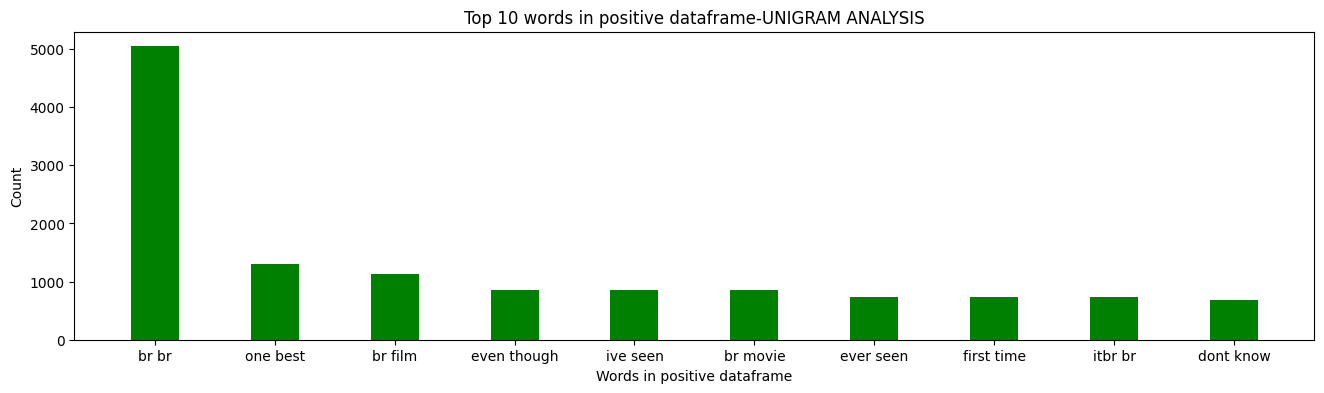

In [79]:
plt.figure(1,figsize=(16,4))
plt.bar(pd1,pd2, color ='green',
        width = 0.4)
plt.xlabel("Words in positive dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in positive dataframe-UNIGRAM ANALYSIS")
plt.savefig("positive-unigram.png")
plt.show()

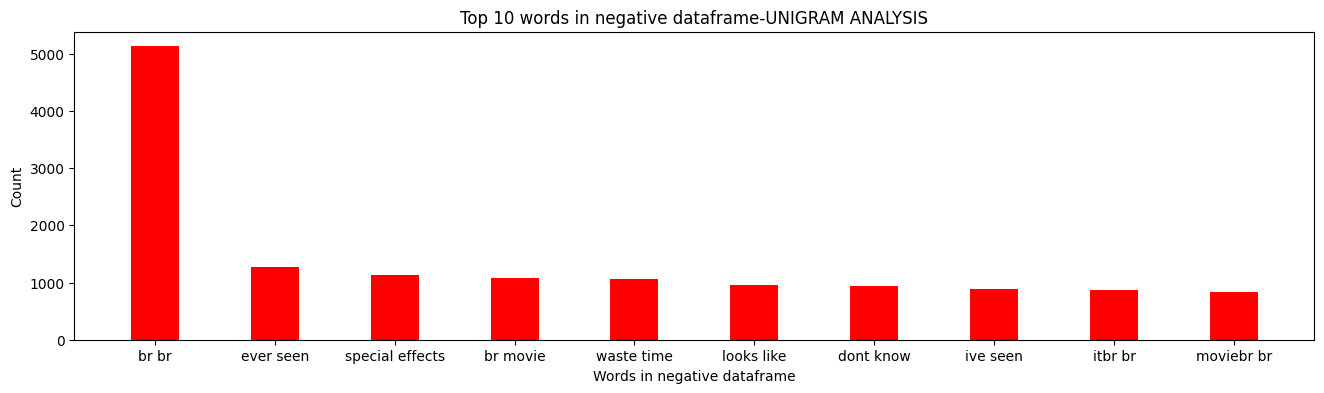

In [80]:
plt.figure(1,figsize=(16,4))
plt.bar(ned1,ned2, color ='red',
        width = 0.4)
plt.xlabel("Words in negative dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in negative dataframe-UNIGRAM ANALYSIS")
plt.savefig("negative-unigram.png")
plt.show()

In [81]:
from sklearn.feature_extraction.text import CountVectorizer

In [101]:
df1_positive=df1[df1['label']==1]
df1_negative=df1[df1['label']==0]
df1_positive

,text,label,process_text
39087,Thomas Mann's controversial novel is the basis...,1,thomas manns controversial novel is the basis ...
45278,Film noir meets anime... brilliant! This was o...,1,film noir meets anime brilliant this was one o...
16398,"I love Eddie Izzard. I think this is awesome, ...",1,i love eddie izzard i think this is awesome an...
13653,"""The Last Big Thing"" is a wonderful satirical ...",1,the last big thing is a wonderful satirical fi...
13748,A man readjusts to life alone after 45 years o...,1,a man readjusts to life alone after years of ...
...,...,...,...
21962,"REIGN OVER ME (2007) *** Adam Sandler, Don Che...",1,reign over me adam sandler don cheadle jada ...
16850,Ruth Gordon is one of the more sympathetic kil...,1,ruth gordon is one of the more sympathetic kil...
44732,This outlandish Troma movie is actually a very...,1,this outlandish troma movie is actually a very...
38158,I found the film Don't Look In The Basement to...,1,i found the film dont look in the basement to ...


In [102]:
df1_positive.process_text

,process_text
39087,thomas manns controversial novel is the basis ...
45278,film noir meets anime brilliant this was one o...
16398,i love eddie izzard i think this is awesome an...
13653,the last big thing is a wonderful satirical fi...
13748,a man readjusts to life alone after years of ...
...,...
21962,reign over me adam sandler don cheadle jada ...
16850,ruth gordon is one of the more sympathetic kil...
44732,this outlandish troma movie is actually a very...
38158,i found the film dont look in the basement to ...


In [103]:
vectorizer = CountVectorizer()

X = vectorizer.fit_transform(df1_positive.process_text)

In [104]:
vectorizer.get_feature_names_out()

array(['aa', 'aaa', 'aaaaagh', ..., 'ünel', 'ünfaithful', 'ýs'],
      dtype=object)

In [2]:
vectorizer2 = CountVectorizer(analyzer='word', ngram_range=(2, 2))

X2 = vectorizer2.fit_transform(df1_positive.process_text)

vectorizer2.get_feature_names_out()

NameError: name 'CountVectorizer' is not defined

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Extract the feature names (bigrams) and their frequencies
bigrams = vectorizer2.get_feature_names_out()
bigram_counts = X2.toarray().sum(axis=0)




NameError: name 'vectorizer2' is not defined

In [ ]:
# Create a DataFrame for better visualization
bigram_df = pd.DataFrame({'bigram': bigrams, 'count': bigram_counts})

# Sort by count in descending order
bigram_df = bigram_df.sort_values(by='count', ascending=False).head(10)  # Top 10 most frequent bigrams

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.barh(bigram_df['bigram'], bigram_df['count'], color='skyblue')
plt.xlabel('Count')
plt.ylabel('Bigrams')
plt.title('Top 10 Most Frequent Bigrams')
plt.gca().invert_yaxis()  # Invert y-axis to show the most frequent at the top
plt.show()